#### Dataset
https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

### 1. Configuração Inicial
---

#### 1.1. Configuração de bibliotecas e datasets

In [528]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


In [529]:
# Importação do dataset a partir do GitHub
dataset = pd.read_csv('https://raw.githubusercontent.com/PedroG022/ComputationalIntelligence/main/Student_Performance.csv')

#### 1.2. Utilidades
##### Conjunto de métodos auxiliares

In [530]:
# Lista as colunas de um dataframe
def column_names(dataframe):
  return [key for key in dataframe.columns]

# Verifica as colunas nulas
def null_columns(dataframe):
  columns = column_names(dataframe)

  null_columns = {column: 0 for column in columns}

  for column in columns:
    null_count = dataframe[column].isnull().sum()
    null_columns[column] = null_count

  return null_columns

### 2. Visualização
#### Métodos para mostrar informações relevantes sobre o dataset
---

In [531]:
dataset[0:5]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [532]:
dataset.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [533]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


### 3. Pré Processamento e limpeza
#### Etapa para realizar o pré-processamento e a limpeza dos dados
---

#### 3.1. Verificação de valores nulos

In [534]:
# Verificação de valores nulos em todas as colunas
null_columns(dataset)

{'Hours Studied': 0,
 'Previous Scores': 0,
 'Extracurricular Activities': 0,
 'Sleep Hours': 0,
 'Sample Question Papers Practiced': 0,
 'Performance Index': 0}

Como não há colunas com valores nulos, **não precisamos** realizar nenhuma ação de processamento, como por exemplo, substituir os valores nulos pela mediana, com esta parte do dataset.

Temos então, nosso dataset editado com a coluna **"Atividades Extracurrículares"** pronta para uso.

#### 3.2. Remoção de colunas
---

In [535]:
# Remoção de colunas
c_dataset = dataset.drop(['Extracurricular Activities'], axis = 1)

#### 3.3. Valores duplicados ⚠️
----

Verificação de linhas duplicadas, VERIFICAR IMPORTÂNCIA

In [536]:
# Verificar colunas duplicadas
c_dataset[c_dataset.duplicated(keep=False)]

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
34,7,67,9,3,60.0
41,2,63,6,0,39.0
96,8,64,5,1,57.0
99,1,49,9,4,25.0
107,9,83,8,7,83.0
...,...,...,...,...,...
9940,8,95,5,2,90.0
9951,1,58,6,7,34.0
9954,6,97,8,7,92.0
9966,1,41,7,3,12.0


In [537]:
c_dataset.drop_duplicates(inplace=True)

In [538]:
c_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9766 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9766 non-null   int64  
 1   Previous Scores                   9766 non-null   int64  
 2   Sleep Hours                       9766 non-null   int64  
 3   Sample Question Papers Practiced  9766 non-null   int64  
 4   Performance Index                 9766 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 457.8 KB


#### 3.4. Normalização ⚠️ 🚧


Removido devido a resultados não esperados

---

In [539]:
# for column in column_names(c_dataset):
#   X = np.array(c_dataset[column]).reshape(-1,1)

#   scaler = MinMaxScaler()
#   scaler.fit(X)

#   c_dataset[column] = scaler.transform(X).reshape(1,-1)[0]

In [540]:
c_dataset

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


#### 3.5. Renomear colunas
---

In [541]:
c_dataset = c_dataset.rename(
    columns = {
        'Hours Studied': 'hrs',
        'Previous Scores': 'psc',
        'Sleep Hours': 'slp',
        'Sample Question Papers Practiced': 'sqp',
        'Performance Index': 'pid'
    }
)

In [542]:
c_dataset

,hrs,psc,slp,sqp,pid
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


### 4. Regressão Linear

In [543]:
study = pd.DataFrame(c_dataset.hrs)
previous_scores = pd.DataFrame(c_dataset.psc)
sleep = pd.DataFrame(c_dataset.slp)
practiced = pd.DataFrame(c_dataset.sqp)

performance = pd.DataFrame(c_dataset.pid)

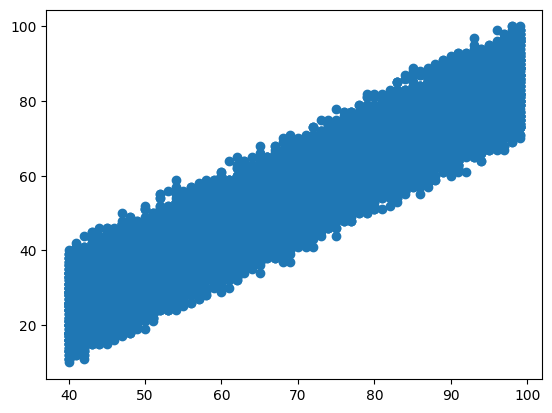

0.9153454039390319

In [544]:
plt.scatter(previous_scores, performance)
plt.show()
c_dataset.pid.corr(c_dataset.psc)

In [545]:
for column in column_names(c_dataset):
    print(f'hr for {column} --- ',pearsonr(c_dataset[column], c_dataset.pid))

hr for hrs ---  PearsonRResult(statistic=0.37545177112041667, pvalue=0.0)
hr for psc ---  PearsonRResult(statistic=0.9153454039390319, pvalue=0.0)
hr for slp ---  PearsonRResult(statistic=0.05100518302080575, pvalue=4.579868028037465e-07)
hr for sqp ---  PearsonRResult(statistic=0.04179318991766235, pvalue=3.605482573222476e-05)
hr for pid ---  PearsonRResult(statistic=1.0, pvalue=0.0)


In [546]:
c_dataset = c_dataset.drop(['pid'], axis = 1)
c_dataset

,hrs,psc,slp,sqp
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [547]:
performance

,pid
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [548]:
rl = LinearRegression()
rl.fit(c_dataset, performance)

LinearRegression()

In [549]:
rl.intercept_

array([-33.75549843])

In [550]:
coef_array = rl.coef_[0]

coef_1 = round(coef_array[0], 2)
coef_2 = round(coef_array[1], 2)
coef_3 = round(coef_array[2], 2)
coef_4 = round(coef_array[3], 2)

In [551]:
func = f'Função = {round(rl.intercept_[0])} + '

func += f'({coef_1} * study_hours) + '
func += f'({coef_2} * previous_score) + '
func += f'({coef_3} * sleep_hours) + '
func += f'({coef_4} * questions_practiced)'

print(func)

Função = -34 + (2.85 * study_hours) + (1.02 * previous_score) + (0.48 * sleep_hours) + (0.19 * questions_practiced)


In [554]:
previsao = rl.predict([[8, 80, 8, 80]])
print(previsao.round(2)[0])

result = -34 + (2.85 * 8) + (1.02 * 80) + (0.48 * 8) + (0.19 * 80)
print(result)

[89.92]
89.44


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
